In [59]:
# Full library list and version numbers

print('This notebook was prepared using:')

import sys
print('python version %s' % sys.version)

import numpy as np
print('numpy version %s' % np.__version__)

import seaborn as sns
print('seaborn version %s' % sns.__version__)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
print('matplotlib version %s' % matplotlib.__version__)

import mplot as mp  # See mplot.py in the current directory

import scipy
from scipy import stats
print('scipy version %s' % scipy.__version__)

import pickle
print('pickle version %s' % pickle.format_version)

import importlib

import lolipop_helper
import figures as FIG
import PALTEanalysis
import tobramycin_analysis

sys.path.append('../paper-clade-reconstruction/src')
import MPL as MPL
import analyze_and_plot as AP
import reconstruct_clades as RC
import infer_fitness as IF
import print_info as PI
import LTEE
import LTEE_helper as LH
import simulation_helper as SH

# GitHub directories
DATA_DIR = './data'
FIG_DIR = './figures'
LOCAL_JOBS_DIR = './data/local_jobs'
SIMULATION_DIR = './data/simulation'
SELECTION_DIR = './data/selection'
SIMULATION_DIR_REL = '../simulation'
SELECTION_DIR_REL = '../selection'

LOLIPOP_JOBS_DIR = './data/lolipop/jobs'
LOLIPOP_INPUT_DIR = './data/lolipop/input'
LOLIPOP_OUTPUT_DIR = './data/lolipop/output'
LOLIPOP_PARSED_OUTPUT_DIR = './data/lolipop/parsed_output'

CLUSTER_JOBS_DIR = './data/cluster_jobs'
LTEE_TRAJ_DIR = './data/LTEE_trajectories'
CLUSTERIZATION_OUTPUT_DIR = './data/clusterization_output'
RECONSTRUCTION_OUTPUT_DIR = './data/reconstruction_output'

LTEE_TRAJ_DIR_REL = '../LTEE_trajectories'
CLUSTERIZATION_OUTPUT_DIR_REL = '../clusterization_output'

METHODS = FIG.METHODS

This notebook was prepared using:
python version 3.6.10 |Anaconda, Inc.| (default, Mar 25 2020, 18:53:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.19.1
seaborn version 0.11.0
matplotlib version 3.3.2
scipy version 1.5.2
pickle version 4.0


In [54]:
def reload():
    importlib.reload(AP)
    importlib.reload(RC)
    importlib.reload(IF)
    importlib.reload(LH)
    importlib.reload(PI)
    importlib.reload(lolipop_helper)
    importlib.reload(FIG)
    importlib.reload(PALTEanalysis)
    importlib.reload(tobramycin_analysis)
    importlib.reload(mp)
    importlib.reload(SH)
reload()

In [3]:
def resetPlottingParams():
    PARAMS = {'text.usetex': False, 'mathtext.fontset': 'stixsans', 'mathtext.default': 'regular', 'pdf.fonttype': 42, 'ps.fonttype': 42}
    plt.rcParams.update(matplotlib.rcParamsDefault)
    plt.rcParams.update(PARAMS)

In [4]:
resetPlottingParams()

In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [6]:
N, T = 1000, 1000
rs = [1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05]
expected_recombination_events = [int(_ * N * N * T / 2) for _ in rs]
print('When recombination rates are ', rs)
print('Expected # of recombination events are ', expected_recombination_events)

When recombination rates are  [1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05]
Expected # of recombination events are  [5, 24, 49, 250, 500, 2500, 5000, 25000]


In [7]:
mus = [1e-4, 2e-4, 5e-4, 1e-3, 2e-3, 5e-3]
expected_mutations = [int(_ * N * T) for _ in mus]
print('When mutation rates are ', mus)
print('Expected # of mutations are ', expected_mutations)

When mutation rates are  [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005]
Expected # of mutations are  [100, 200, 500, 1000, 2000, 5000]


In [28]:
# Set parameters for simulation
reload()
p = SH.Params()

In [101]:
# Recombination
reload()
ps = []
rs = [1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05]
jobnames = [f'simulation_local_submission_r={r}' for r in rs]
for r, jobname in zip(rs, jobnames):
    p = SH.Params(recombination=True, recombination_rate=r, num_trials=40)
    ps.append(p)
    SH.generate_local_shell_script(p, jobname=jobname)
SH.generate_local_shell_script_for_jobs(jobnames)


In [129]:
# Recombination negative_mean
reload()
ps_negative_mean = []
rs_negative_mean = [1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 1e-4, 5e-4]
jobnames = [f'simulation_local_submission_r={r}' for r in rs_negative_mean]
for r, jobname in zip(rs_negative_mean, jobnames):
    p = SH.Params(recombination=True, recombination_rate=r, num_trials=40,
                  meanS=-0.02, stdS=0.02, mu=1e-3)
    ps_negative_mean.append(p)
    SH.generate_local_shell_script(p, jobname=jobname)
SH.generate_local_shell_script_for_jobs(jobnames)


In [9]:
# Recombination negative_mean_high_mu
reload()
ps_negative_mean_high_mu = []
rs_negative_mean_high_mu = [1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 1e-4, 5e-4]
jobnames = [f'simulation_local_submission_r={r}' for r in rs_negative_mean_high_mu]
for r, jobname in zip(rs_negative_mean_high_mu, jobnames):
    p = SH.Params(recombination=True, recombination_rate=r, num_trials=40,
                  meanS=-0.02, stdS=0.02, mu=3e-3)
    ps_negative_mean_high_mu.append(p)
    SH.generate_local_shell_script(p, jobname=jobname)
SH.generate_local_shell_script_for_jobs(jobnames)


In [37]:
# Mutation rate
reload()
ps_zero_mean_varying_mu = []
xs_zero_mean_varying_mu = [4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4, 1e-3, 2e-3, 3e-3, 4e-3, 5e-3, 6e-3, 7e-3]
jobnames = [f'simulation_local_submission_mu={mu}' for mu in xs_zero_mean_varying_mu]
for mu, jobname in zip(xs_zero_mean_varying_mu, jobnames):
    p = SH.Params(mu=mu, num_trials=40, meanS=0, stdS=0.015)
    ps_zero_mean_varying_mu.append(p)
    SH.generate_local_shell_script(p, jobname=jobname)
SH.generate_local_shell_script_for_jobs(jobnames)


In [36]:
# Cooccurence
reload()
ps_zero_mean_varying_cooccurence = []
xs_zero_mean_varying_cooccurence = [1, 2, 3, 4, 5, 6]
jobnames = [f'simulation_local_submission_cooc={_}' for _ in xs_zero_mean_varying_cooccurence]
for cooc, jobname in zip(xs_zero_mean_varying_cooccurence, jobnames):
    p = SH.Params(cooccurence=True, max_cooccuring_mutations=cooc, mu=1e-3, 
                  num_trials=40, meanS=0, stdS=0.015)
    ps_zero_mean_varying_cooccurence.append(p)
    SH.generate_local_shell_script(p, jobname=jobname)
SH.generate_local_shell_script_for_jobs(jobnames, jobname='simulation_cooccurence_local_submission')


In [66]:
# Controlled genotype fitness
reload()
ps_zero_mean_controlled_fitness = []
xs_zero_mean_controlled_fitness = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3]
jobnames = [f'simulation_local_submission_controlled={_}' for _ in xs_zero_mean_controlled_fitness]
for rate, jobname in zip(xs_zero_mean_controlled_fitness, jobnames):
    p = SH.Params(controlled_genotype_fitness=True, genotype_fitness_increase_rate=rate, mu=1e-3, 
                  num_trials=40, meanS=0.03, stdS=0.01)
    ps_zero_mean_controlled_fitness.append(p)
    SH.generate_local_shell_script(p, jobname=jobname)
SH.generate_local_shell_script_for_jobs(jobnames, jobname='simulation_controlled_local_submission')


In [96]:
# Wright-Fisher simulation
reload()
ps_WF_varying_L = []
# xs_WF_varying_L = [10, 15, 20]
xs_WF_varying_L = [10, 15, 20, 30, 40, 50]
jobnames = [f'simulation_WF_local_submission_L={_}' for _ in xs_WF_varying_L]
for L, jobname in zip(xs_WF_varying_L, jobnames):
#     selection = np.random.normal(0, 0.015, size=L)
#     np.save(SELECTION_DIR + f'/selection_L={L}', selection)
    s = f'{SELECTION_DIR_REL}/selection_L={L}.npy'
    p = SH.Params_WF(s, L=L)
    ps_WF_varying_L.append(p)
    SH.generate_local_shell_script_for_WF_simulation(p, jobname=jobname)
SH.generate_local_shell_script_for_jobs(jobnames, jobname='simulation_WF_local_submission')


In [99]:
# Wright-Fisher simulation
reload()
ps_WF_varying_L = []
# xs_WF_varying_L = [10, 15, 20]
xs_WF_varying_L = [10, 15, 20, 30, 40, 50]
jobnames = [f'simulation_WF_local_submission_L={_}' for _ in xs_WF_varying_L]
for L, jobname in zip(xs_WF_varying_L, jobnames):
#     selection = np.random.normal(0, 0.015, size=L)
#     np.save(SELECTION_DIR + f'/selection_L={L}', selection)
    s = f'{SELECTION_DIR_REL}/selection_L={L}.npy'
    p = SH.Params_WF(s, L=L, num_trials=20)
    ps_WF_varying_L.append(p)
    SH.generate_local_shell_script_for_WF_simulation(p, jobname=jobname)
SH.generate_local_shell_script_for_jobs(jobnames, jobname='simulation_WF_local_submission')


In [58]:
reload()
SH.generate_shell_script_local(p)

Execute the shell script to simulate

In [61]:
SH.create_tables_for_Lolipop(p)

In [31]:
SH.create_job_file_for_Lolipop(p)

Execute the shell script to run Lolipop for simuated data

In [32]:
SH.save_parsed_output_for_Lolipop(p)

/Users/yunxiao/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	

meanS=0.03, stdS=0.01


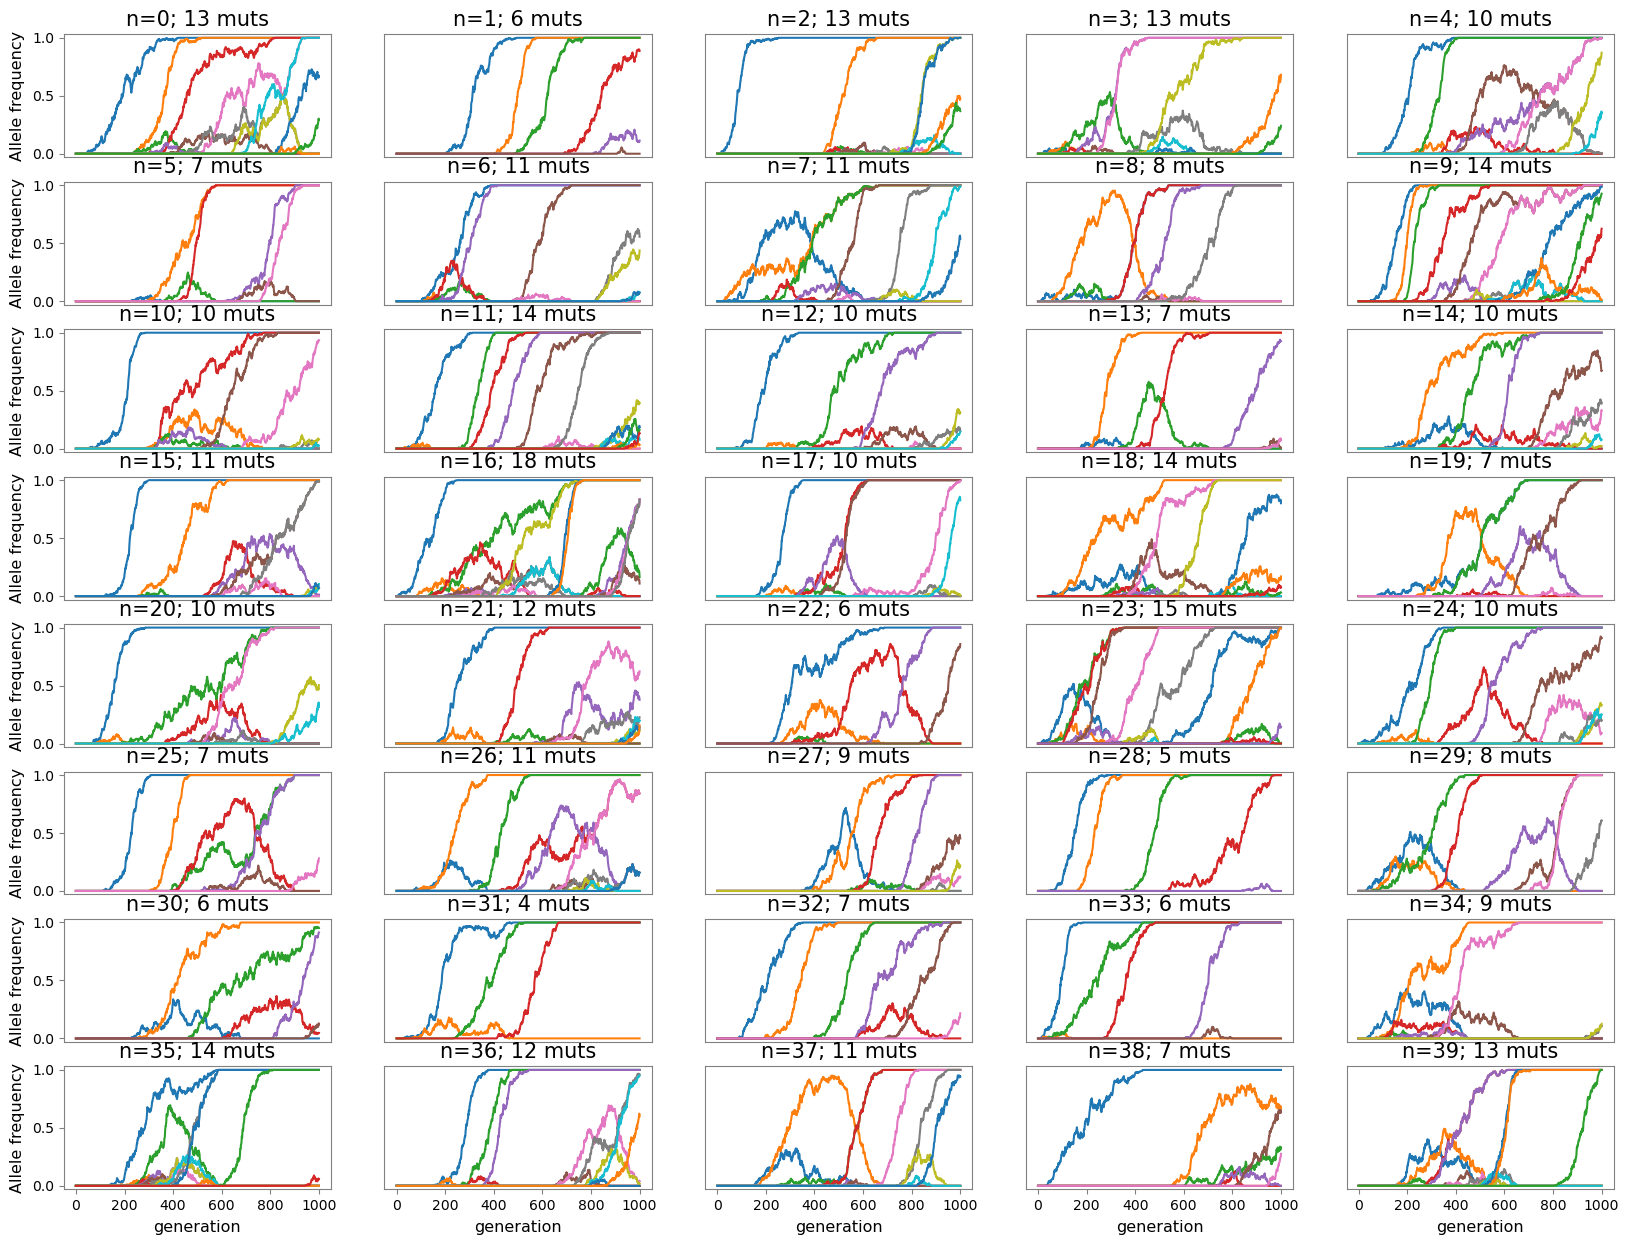

In [105]:
reload()
SH.plot_simulation(ps[0], plot_clade_traj=False)

meanS=0.03, stdS=0.01


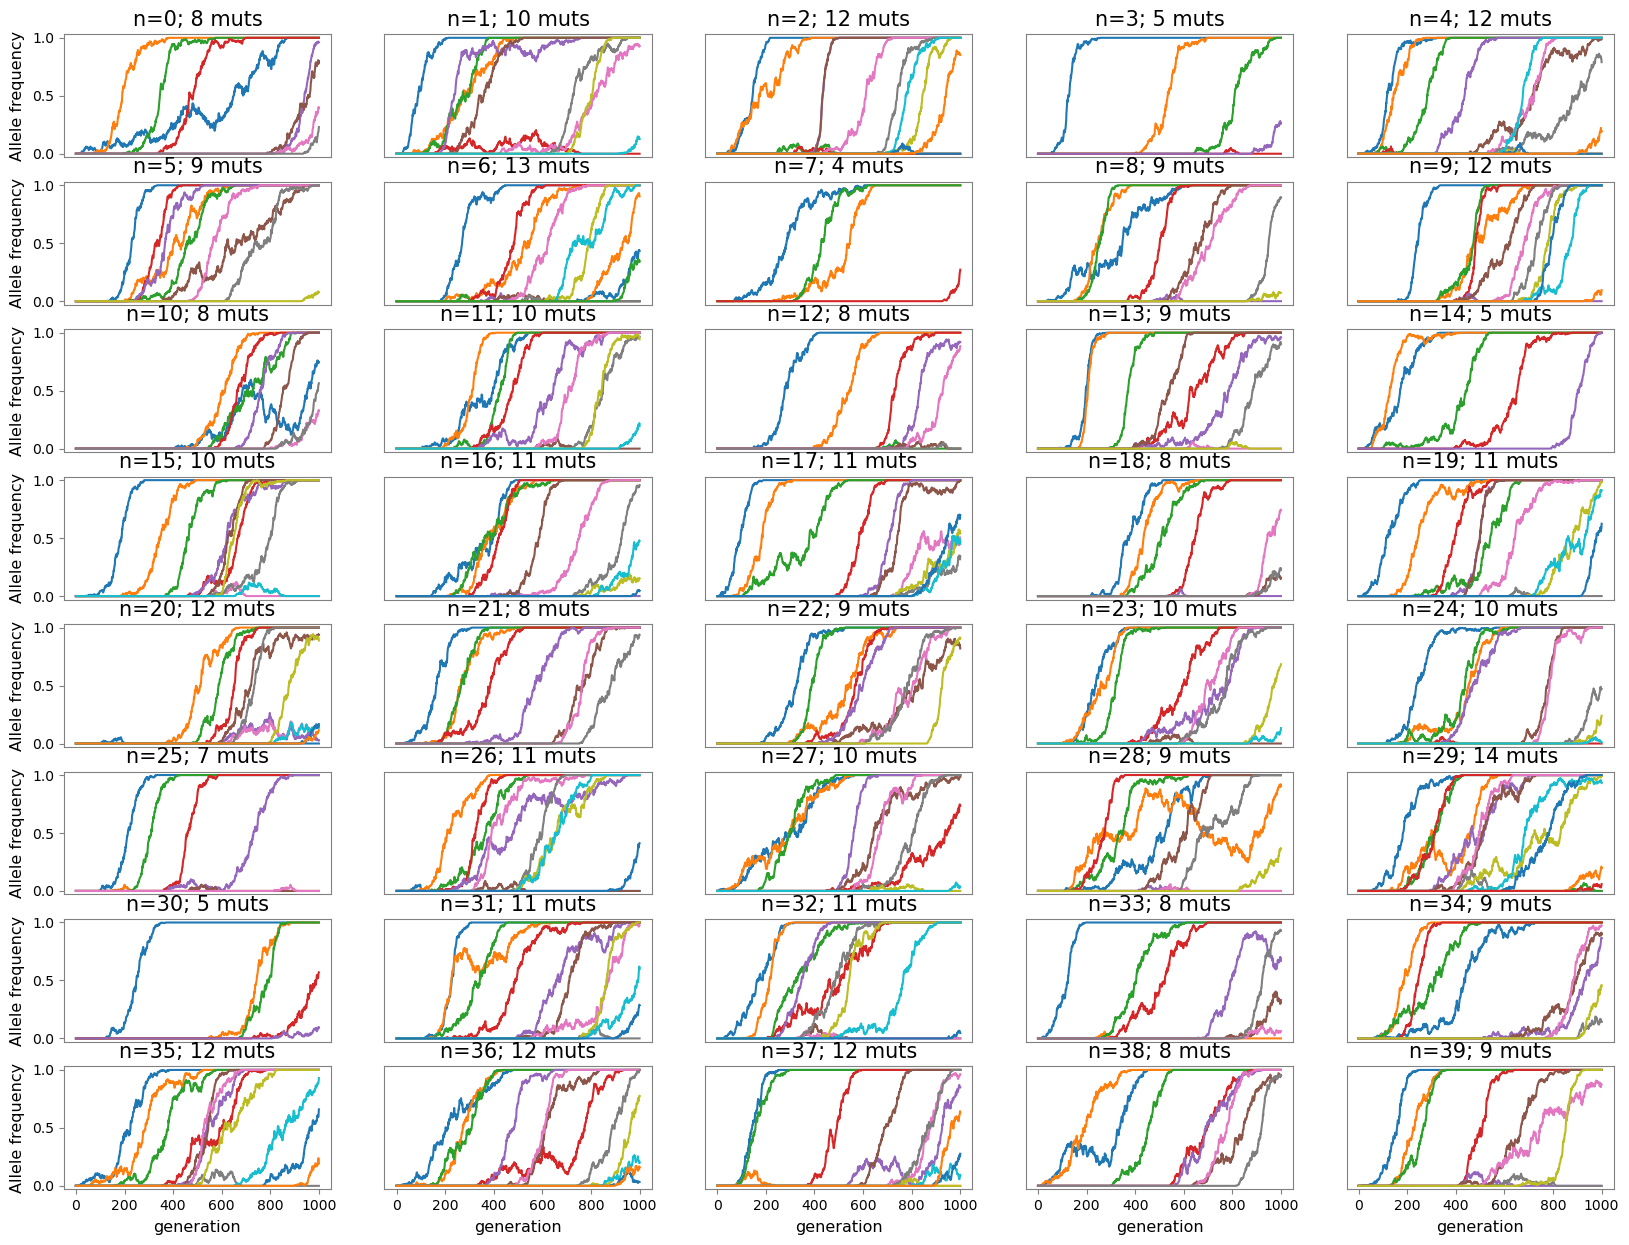

In [106]:
reload()
SH.plot_simulation(ps[-1], plot_clade_traj=False)

meanS=0.03, stdS=0.01


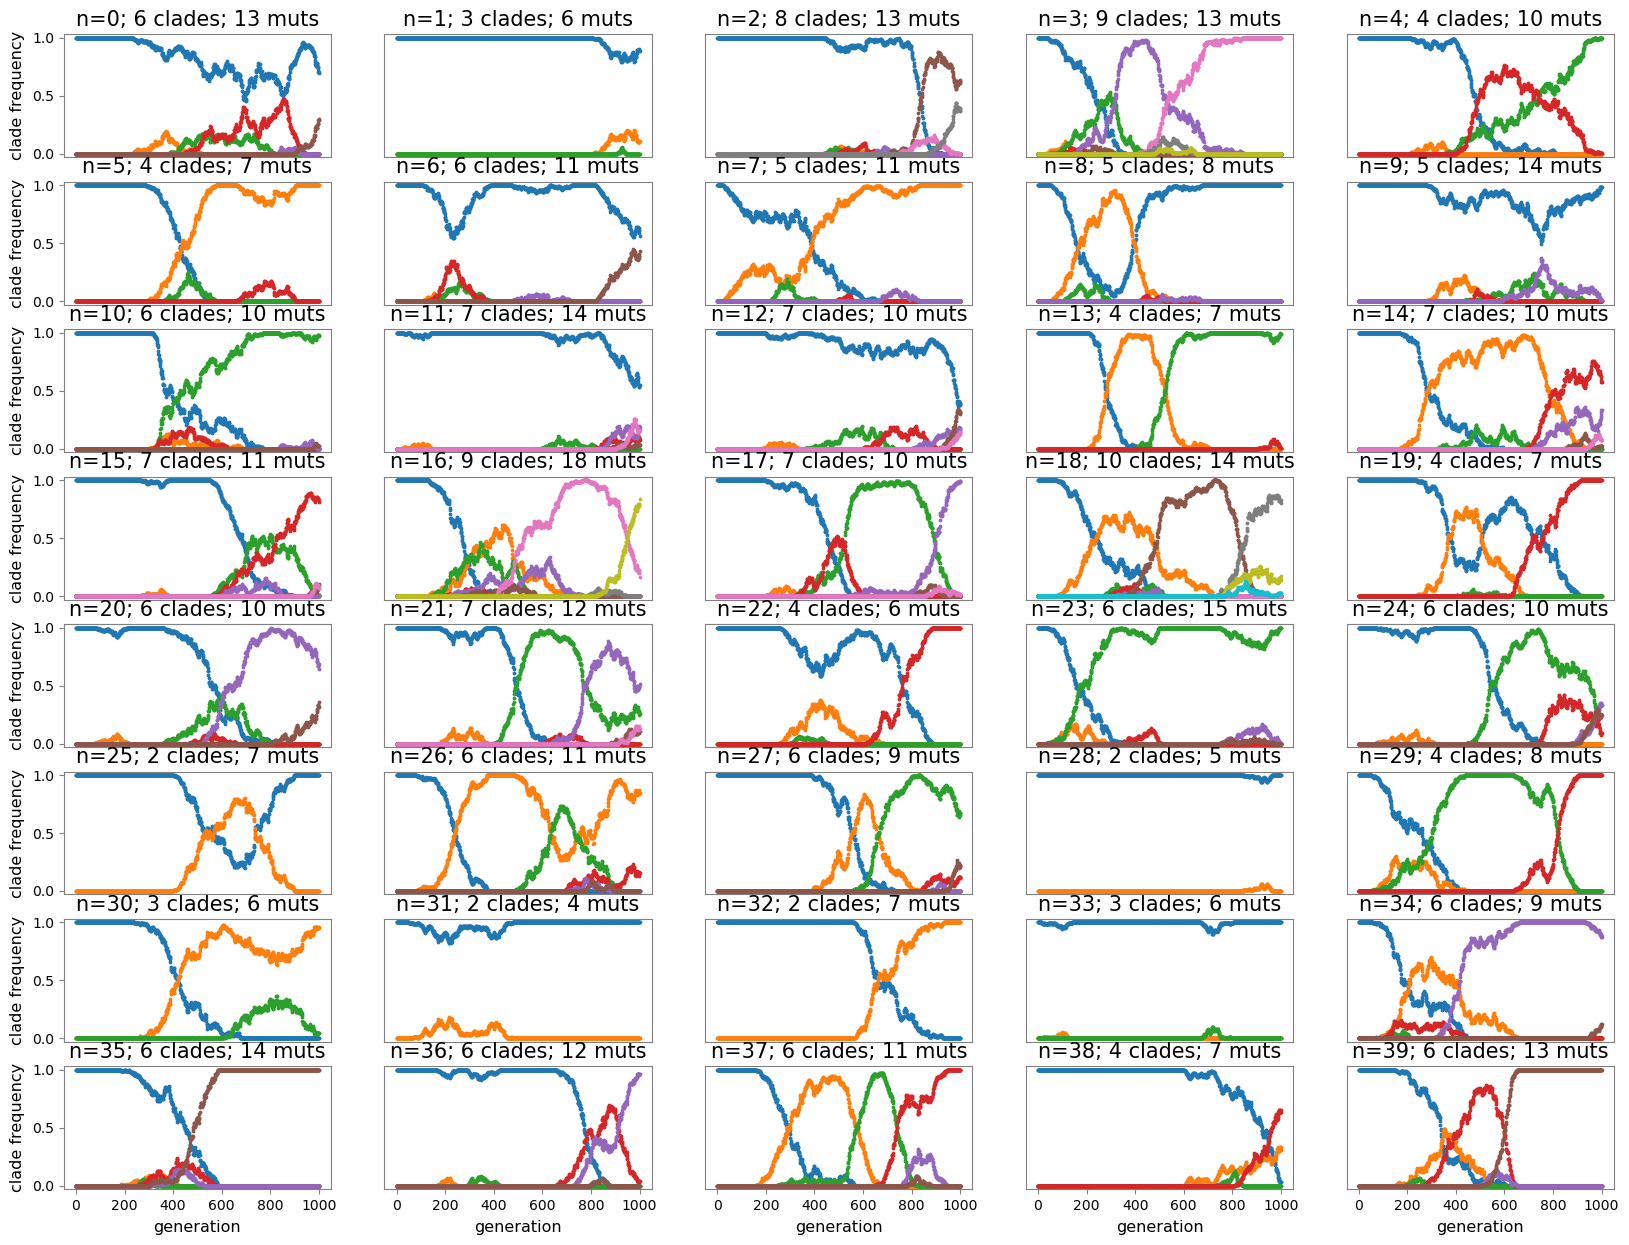

In [92]:
SH.plot_simulation(ps[0])

meanS=0.03, stdS=0.01


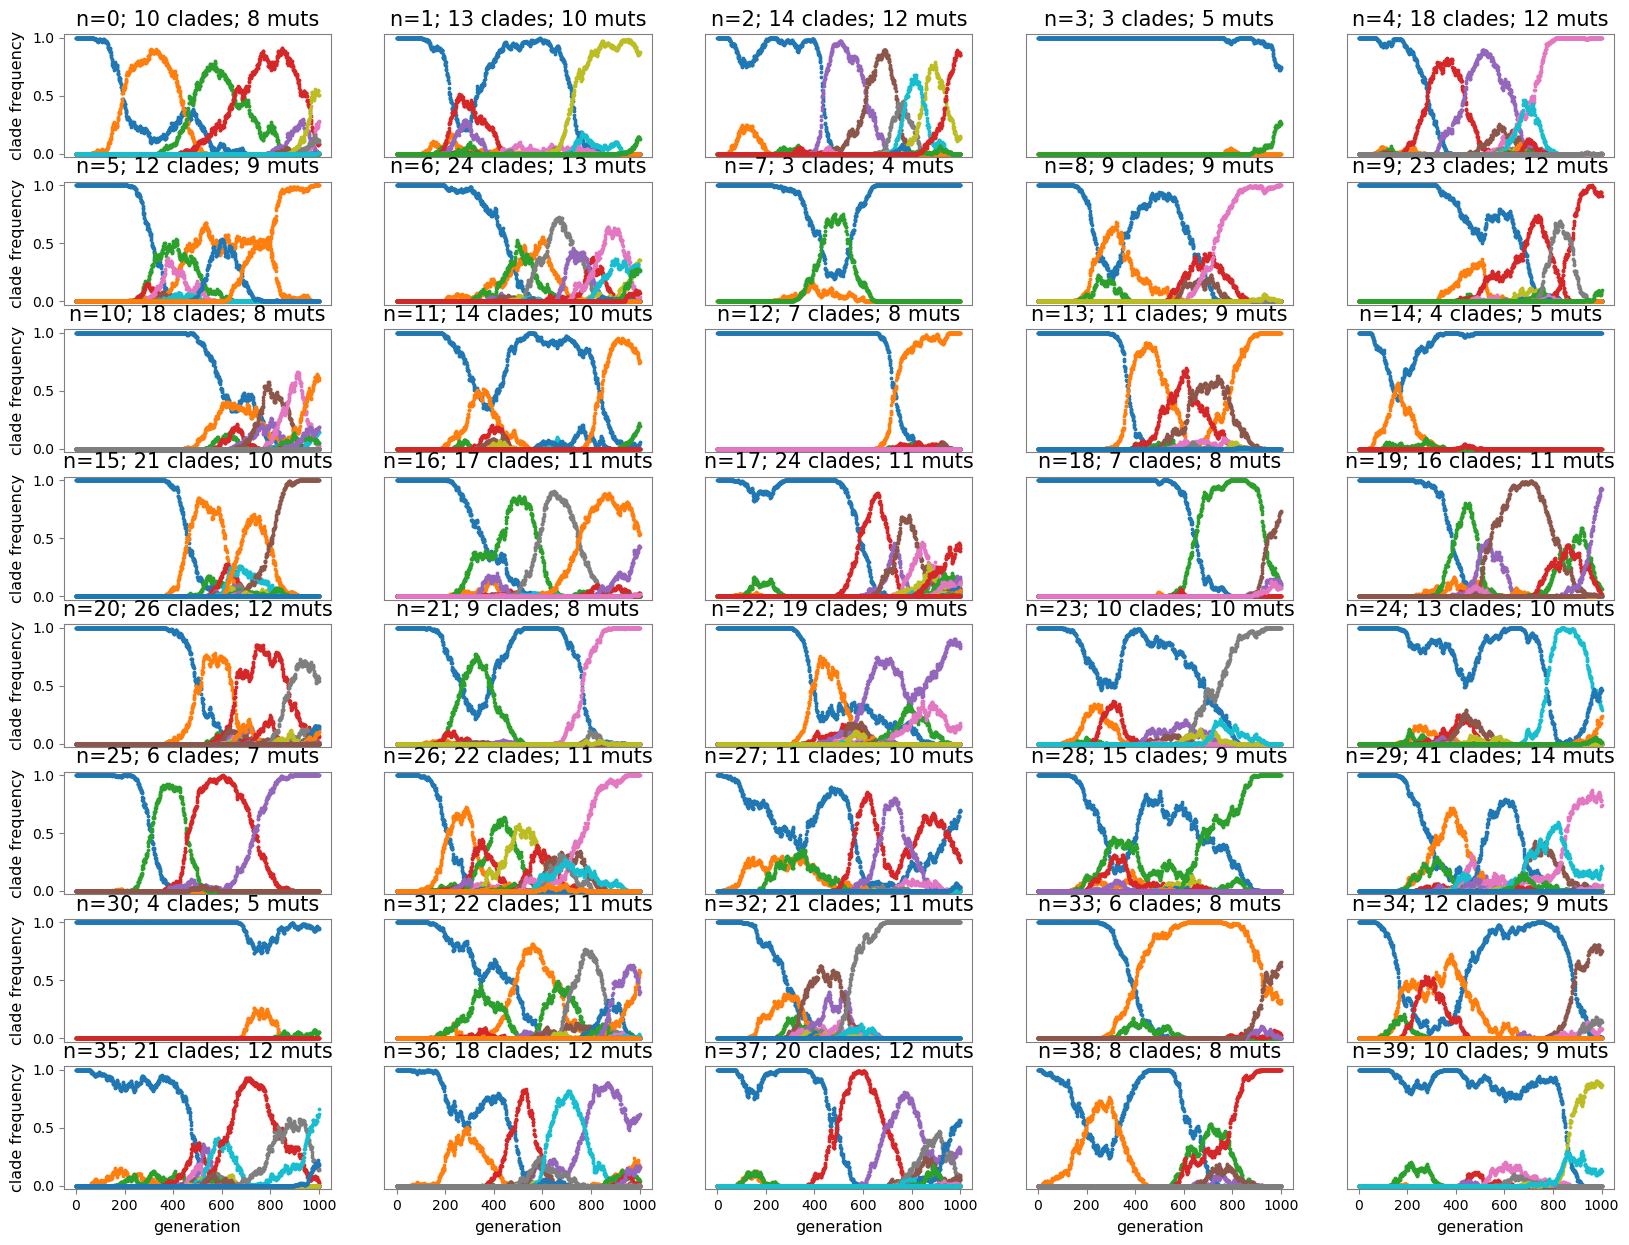

In [91]:
SH.plot_simulation(ps[-1])

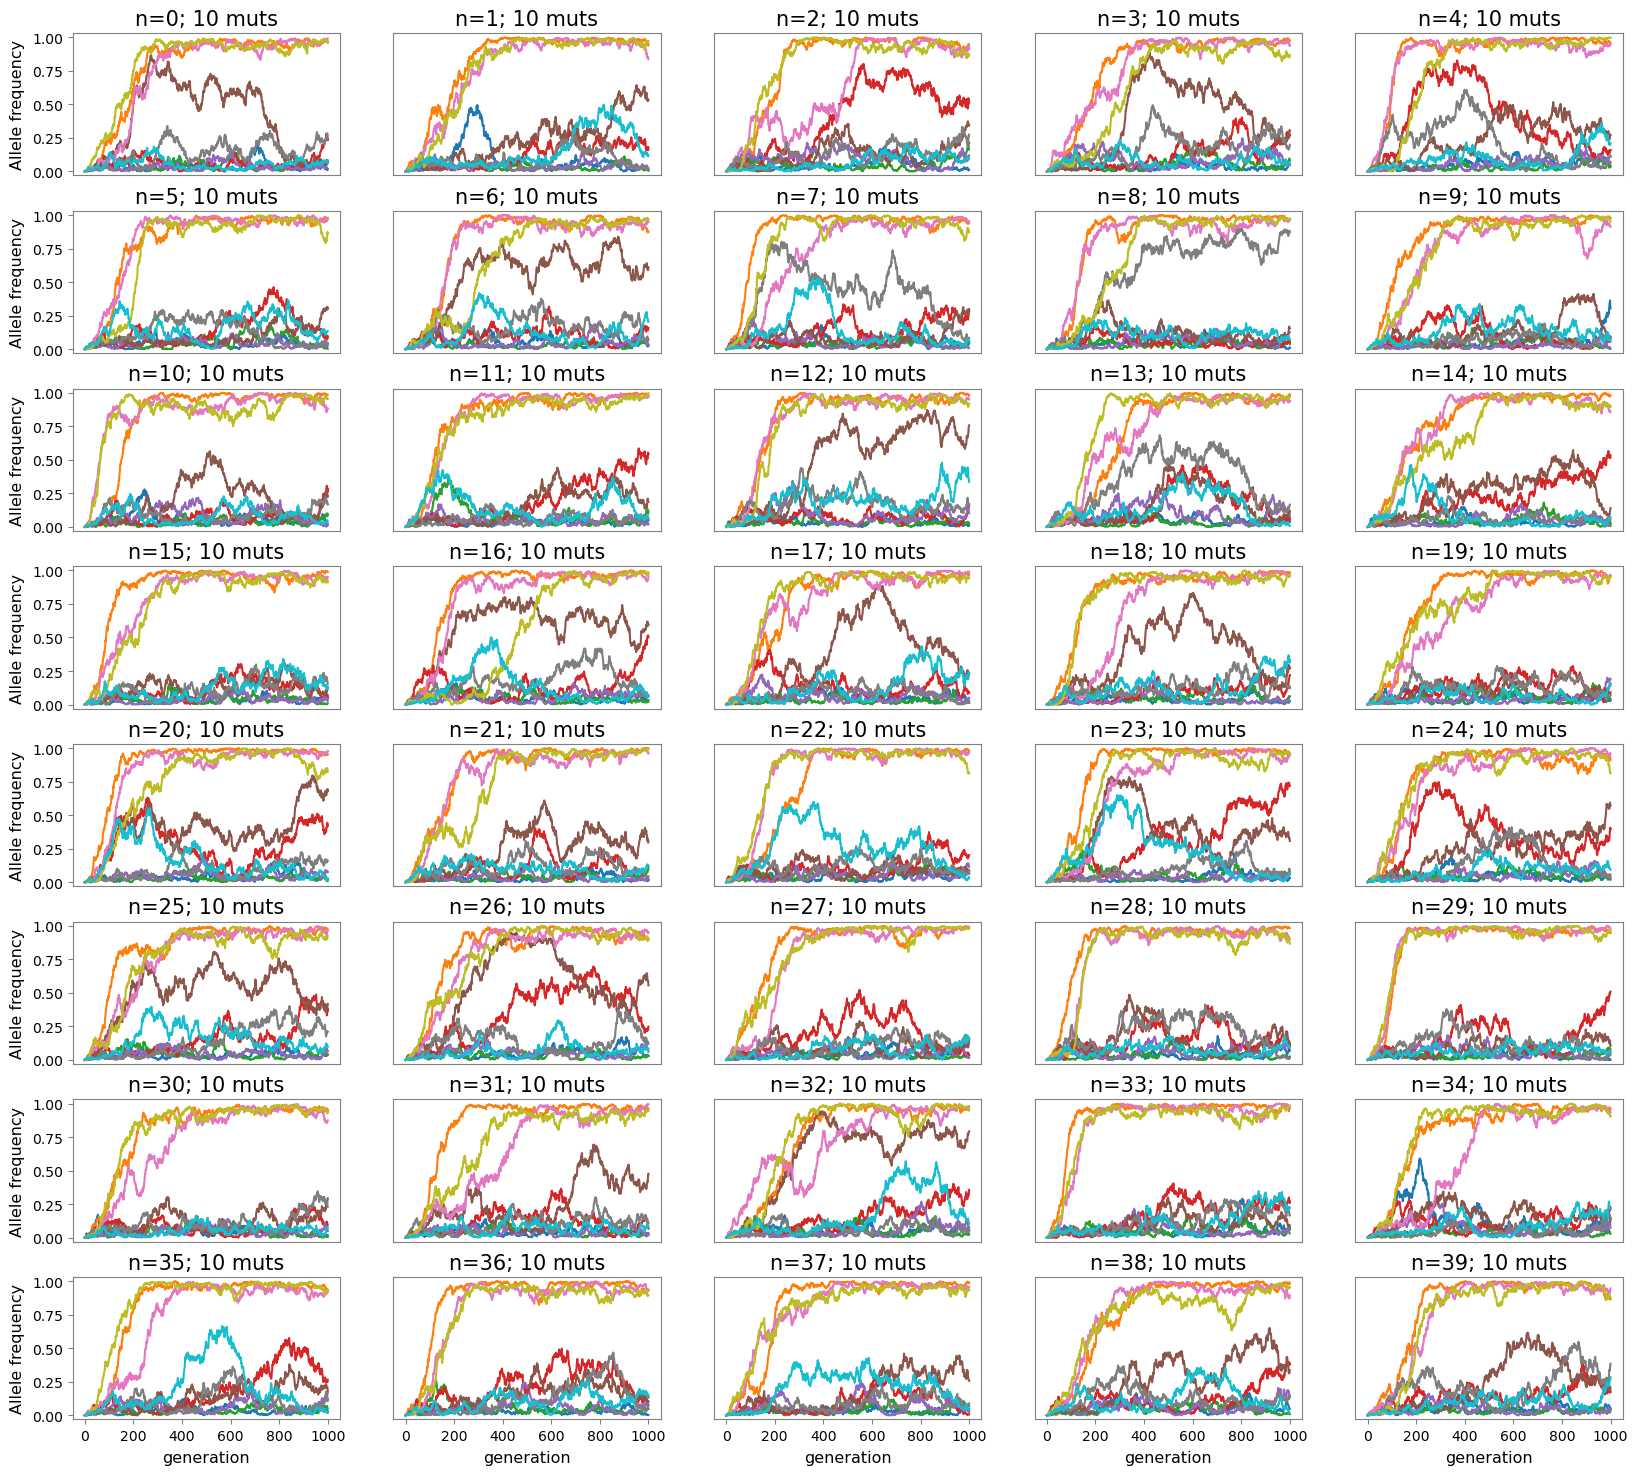

In [90]:
reload()
SH.plot_WF_simulation(ps_zero_mean_WF_varying_L[0])

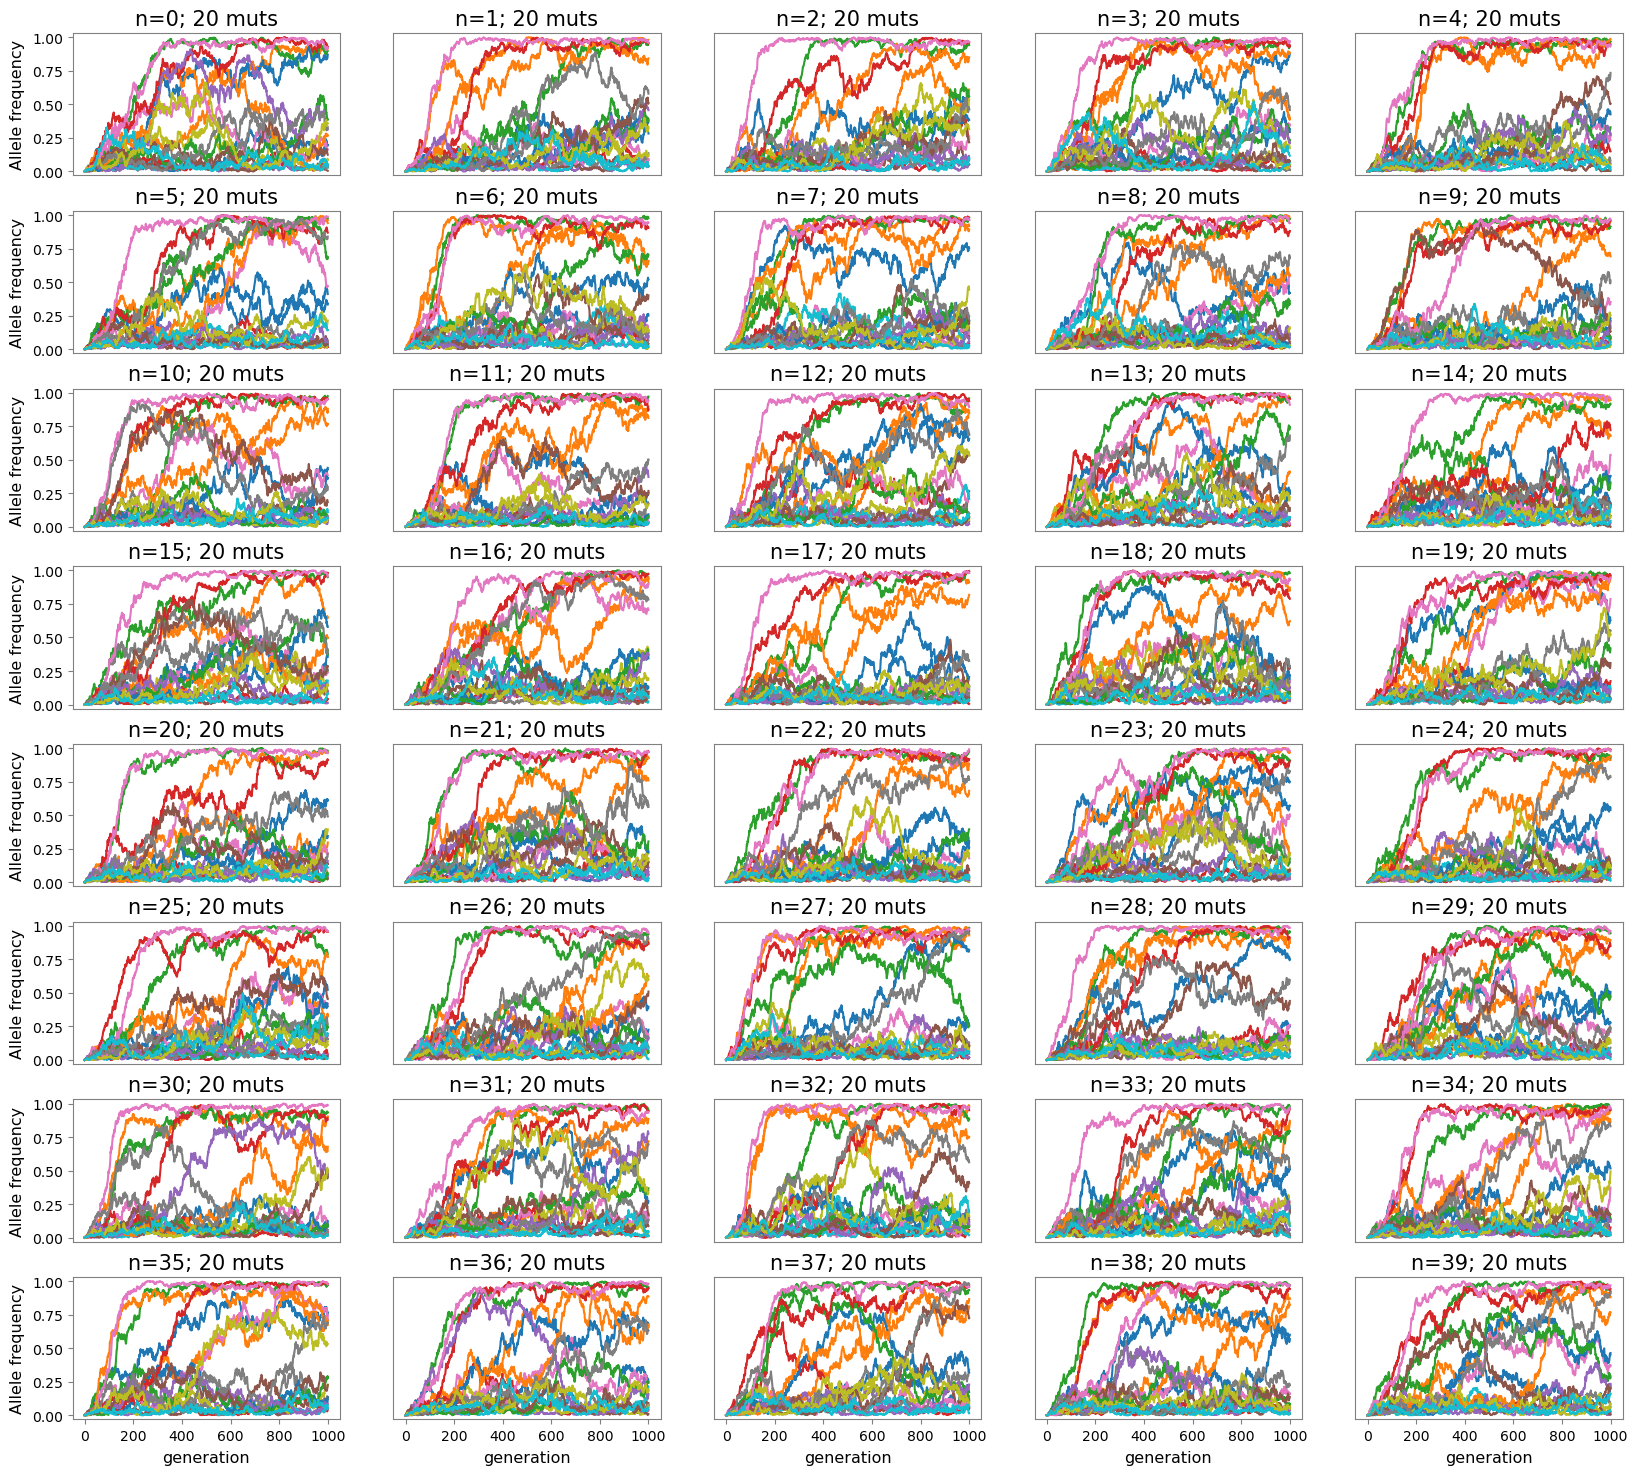

In [89]:
reload()
SH.plot_WF_simulation(ps_zero_mean_WF_varying_L[-1])

## meanS=0.03, stdS=0.01, mu=2e-4

In [102]:
%%time
reload()
(MAE_selection_dic, Spearmanr_selection_dic, MAE_fitness_dic, 
 Spearmanr_fitness_dic) = SH.parse_performance_for_ps(ps, rs, 
    methods=['true_cov', 'SL'])

n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	

rate=1e-08, #genotypes=[15, 7, 14, 14, 11, 8, 12, 12, 9, 15]...
rate=1e-07, #genotypes=[11, 10, 12, 7, 19, 11, 7, 15, 9, 12]...
rate=1e-06, #genotypes=[44, 23, 10, 21, 25, 11, 14, 30, 14, 15]...
rate=1e-05, #genotypes=[17, 19, 20, 17, 49, 66, 23, 17, 22, 24]...
rate=5e-08, #genotypes=[10, 9, 17, 8, 11, 11, 16, 19, 8, 8]...
rate=5e-07, #genotypes=[10, 15, 23, 20, 20, 21, 7, 26, 11, 11]...
rate=5e-06, #genotypes=[23, 22, 39, 26, 38, 23, 32, 20, 38, 37]...
rate=5e-05, #genotypes=[27, 47, 39, 8, 48, 44, 57, 9, 25, 59]...


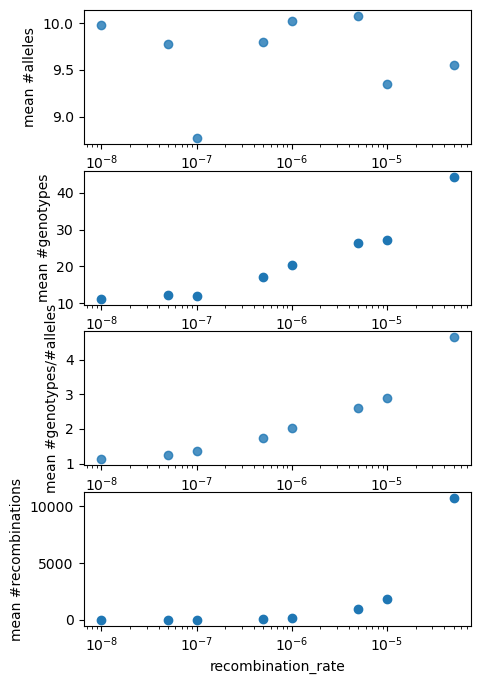

In [90]:
%%time
reload()
SH.plot_num_genotypes_vs_num_alleles_for_ps(ps, rs)

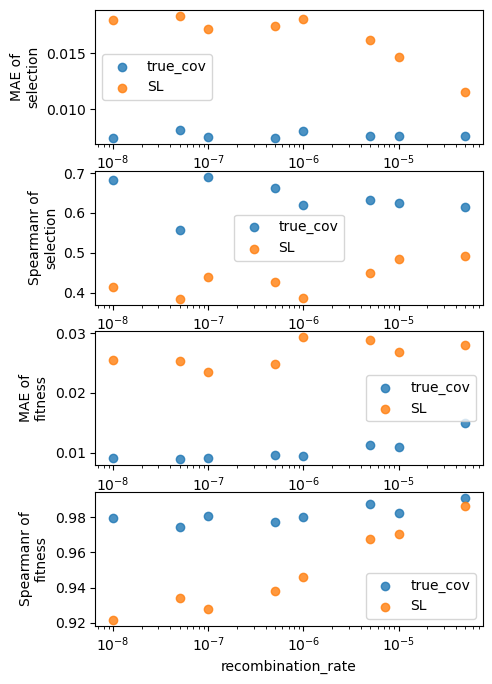

In [103]:
reload()
SH.plot_performance_for_ps(MAE_selection_dic, Spearmanr_selection_dic, 
    MAE_fitness_dic, Spearmanr_fitness_dic, rs, methods=['true_cov', 'SL'])

## meanS=-0.02, stdS=0.02, mu=1e-3

In [130]:
%%time
reload()
(MAE_selection_dic_negative_mean, Spearmanr_selection_dic_negative_mean, MAE_fitness_dic_negative_mean, 
 Spearmanr_fitness_dic_negative_mean) = SH.parse_performance_for_ps(ps_negative_mean, rs_negative_mean, 
    methods=['true_cov', 'SL'])

n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	

/Users/yunxiao/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/yunxiao/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	

rate=1e-08, #genotypes=[10, 6, 9, 11, 13, 9, 8, 8, 10, 12]...
rate=5e-08, #genotypes=[8, 13, 7, 10, 7, 28, 16, 10, 11, 10]...
rate=1e-07, #genotypes=[8, 13, 10, 11, 10, 11, 13, 11, 15, 9]...
rate=5e-07, #genotypes=[20, 10, 14, 12, 9, 19, 18, 11, 19, 12]...
rate=1e-06, #genotypes=[20, 14, 16, 17, 7, 3, 24, 28, 11, 9]...
rate=5e-06, #genotypes=[8, 14, 16, 28, 19, 26, 13, 16, 8, 14]...
rate=1e-05, #genotypes=[13, 15, 13, 10, 4, 11, 8, 15, 14, 20]...
rate=5e-05, #genotypes=[24, 12, 40, 8, 28, 11, 17, 5, 14, 32]...
rate=0.0001, #genotypes=[27, 31, 69, 36, 40, 27, 60, 70, 38, 7]...
rate=0.0005, #genotypes=[13, 11, 59, 24, 12, 11, 48, 40, 7, 32]...


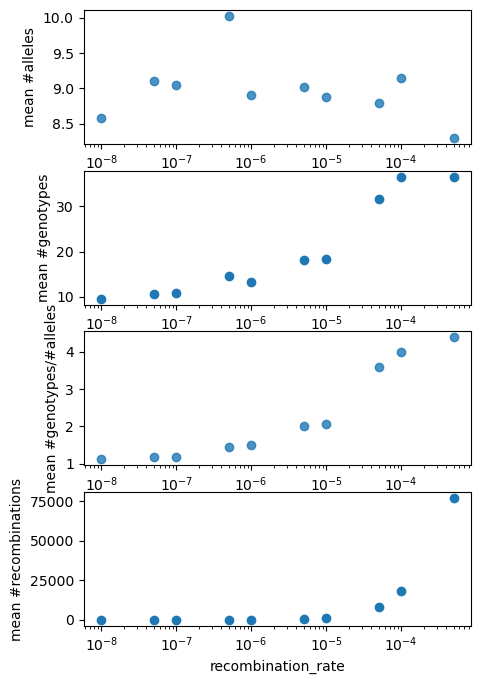

In [135]:
%%time
reload()
SH.plot_num_genotypes_vs_num_alleles_for_ps(ps_negative_mean, rs_negative_mean)

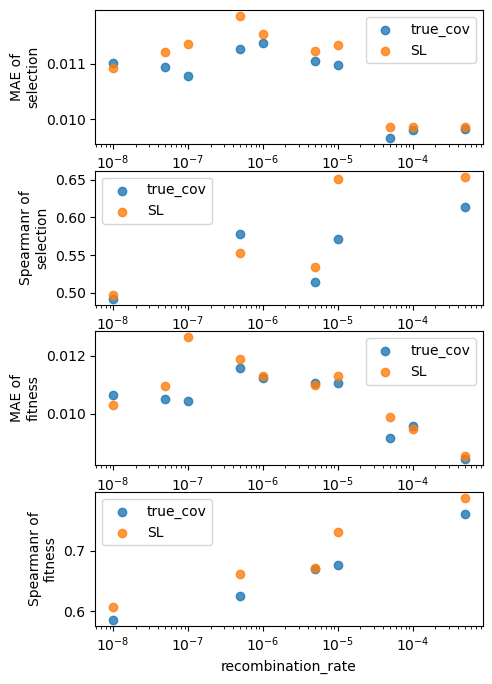

In [134]:
reload()
SH.plot_performance_for_ps(MAE_selection_dic_negative_mean, 
    Spearmanr_selection_dic_negative_mean, MAE_fitness_dic_negative_mean, 
    Spearmanr_fitness_dic_negative_mean, rs_negative_mean, 
    methods=['true_cov', 'SL'])

## meanS=-0.02, stdS=0.02, mu=3e-3

In [138]:
%%time
reload()
(MAE_selection_dic_negative_mean_high_mu, Spearmanr_selection_dic_negative_mean_high_mu, MAE_fitness_dic_negative_mean_high_mu, 
 Spearmanr_fitness_dic_negative_mean_high_mu) = SH.parse_performance_for_ps(ps_negative_mean_high_mu, 
    methods=['true_cov', 'SL'])

n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	

rate=1e-08, #genotypes=[30, 20, 11, 25, 26, 25, 32, 28, 22, 27]...
rate=5e-08, #genotypes=[30, 26, 27, 39, 34, 26, 27, 23, 17, 28]...
rate=1e-07, #genotypes=[46, 22, 28, 30, 30, 30, 30, 29, 31, 32]...
rate=5e-07, #genotypes=[42, 43, 38, 51, 47, 34, 45, 32, 42, 46]...
rate=1e-06, #genotypes=[56, 64, 26, 47, 68, 35, 40, 39, 51, 36]...
rate=5e-06, #genotypes=[70, 99, 48, 53, 131, 67, 66, 64, 81, 88]...
rate=1e-05, #genotypes=[111, 84, 225, 286, 29, 30, 70, 171, 141, 89]...
rate=5e-05, #genotypes=[223, 271, 314, 101, 116, 332, 139, 428, 76, 79]...
rate=0.0001, #genotypes=[183, 275, 240, 254, 241, 116, 301, 339, 239, 186]...
rate=0.0005, #genotypes=[152, 628, 2316, 181, 156, 1164, 1417, 310, 1056, 773]...


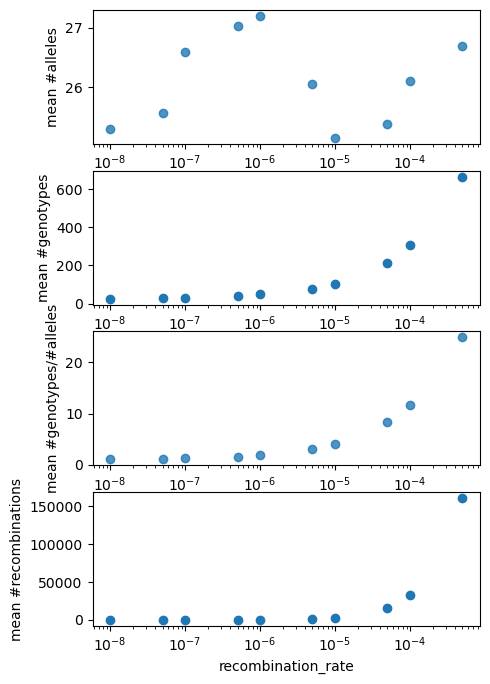

In [137]:
%%time
reload()
SH.plot_num_genotypes_vs_num_alleles_for_ps(ps_negative_mean_high_mu, rs_negative_mean_high_mu)

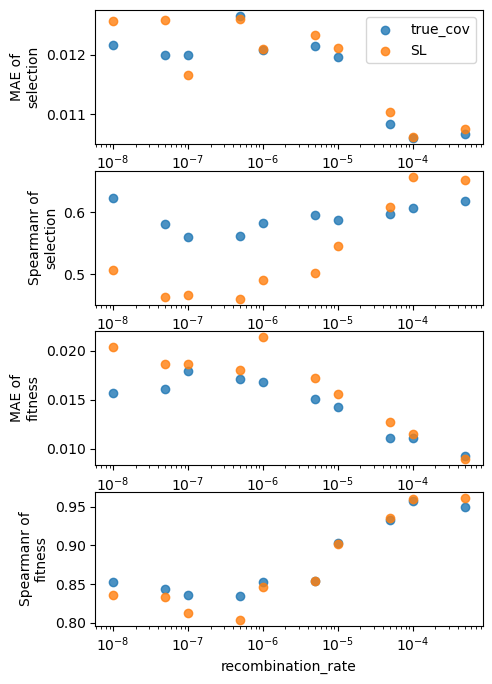

In [142]:
reload()
SH.plot_performance_for_ps(MAE_selection_dic_negative_mean_high_mu, 
    Spearmanr_selection_dic_negative_mean_high_mu, MAE_fitness_dic_negative_mean_high_mu, 
    Spearmanr_fitness_dic_negative_mean_high_mu, rs_negative_mean_high_mu, 
    methods=['true_cov', 'SL'])

## meanS=0, stdS=0.015, varying mutation rate

In [38]:
%%time
reload()
(MAE_selection_dic_zero_mean_varying_mu, Spearmanr_selection_dic_zero_mean_varying_mu, MAE_fitness_dic_zero_mean_varying_mu, 
 Spearmanr_fitness_dic_zero_mean_varying_mu) = SH.parse_performance_for_ps(ps_zero_mean_varying_mu, 
    methods=['true_cov', 'SL'])

CPU times: user 47min 28s, sys: 40.4 s, total: 48min 8s
Wall time: 43min 28s


rate=1e-08, #genotypes=[30, 20, 11, 25, 26, 25, 32, 28, 22, 27]...
rate=5e-08, #genotypes=[30, 26, 27, 39, 34, 26, 27, 23, 17, 28]...
rate=1e-07, #genotypes=[46, 22, 28, 30, 30, 30, 30, 29, 31, 32]...
rate=5e-07, #genotypes=[42, 43, 38, 51, 47, 34, 45, 32, 42, 46]...
rate=1e-06, #genotypes=[56, 64, 26, 47, 68, 35, 40, 39, 51, 36]...
rate=5e-06, #genotypes=[70, 99, 48, 53, 131, 67, 66, 64, 81, 88]...
rate=1e-05, #genotypes=[111, 84, 225, 286, 29, 30, 70, 171, 141, 89]...
rate=5e-05, #genotypes=[223, 271, 314, 101, 116, 332, 139, 428, 76, 79]...
rate=0.0001, #genotypes=[183, 275, 240, 254, 241, 116, 301, 339, 239, 186]...
rate=0.0005, #genotypes=[152, 628, 2316, 181, 156, 1164, 1417, 310, 1056, 773]...


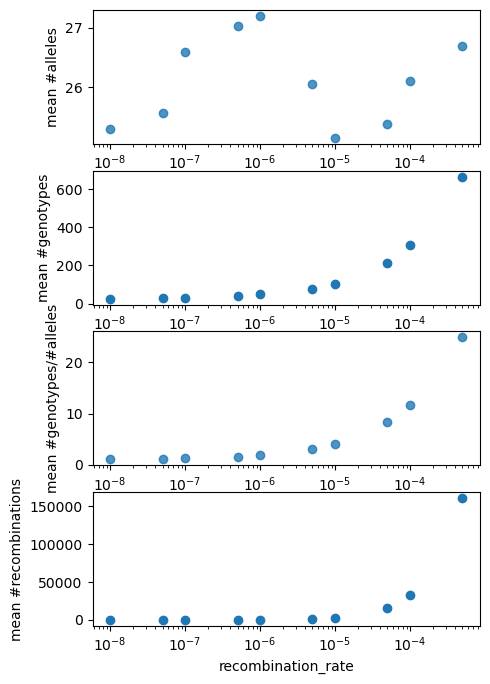

In [137]:
# %%time
# reload()
# SH.plot_num_genotypes_vs_num_alleles_for_ps(ps_zero_mean_varying_mu, xs_zero_mean_varying_mu)


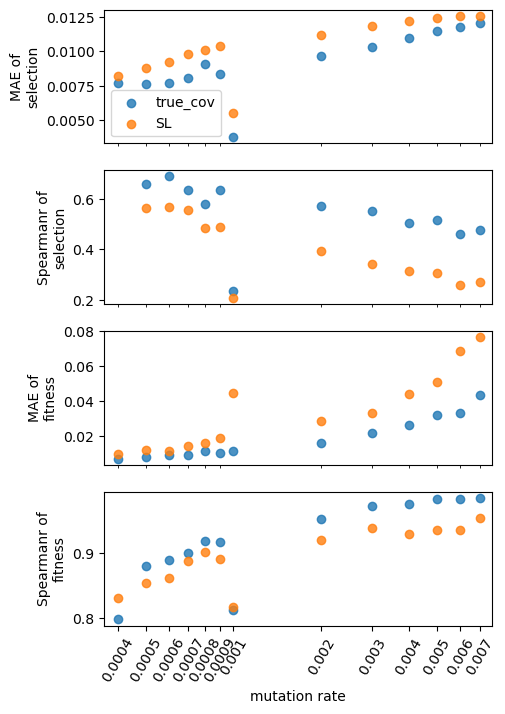

In [39]:
reload()
SH.plot_performance_for_ps(MAE_selection_dic_zero_mean_varying_mu, 
    Spearmanr_selection_dic_zero_mean_varying_mu, MAE_fitness_dic_zero_mean_varying_mu, 
    Spearmanr_fitness_dic_zero_mean_varying_mu, xs_zero_mean_varying_mu, 
    xlabel='mutation rate', 
    methods=['true_cov', 'SL'])

posx and posy should be finite values
posx and posy should be finite values


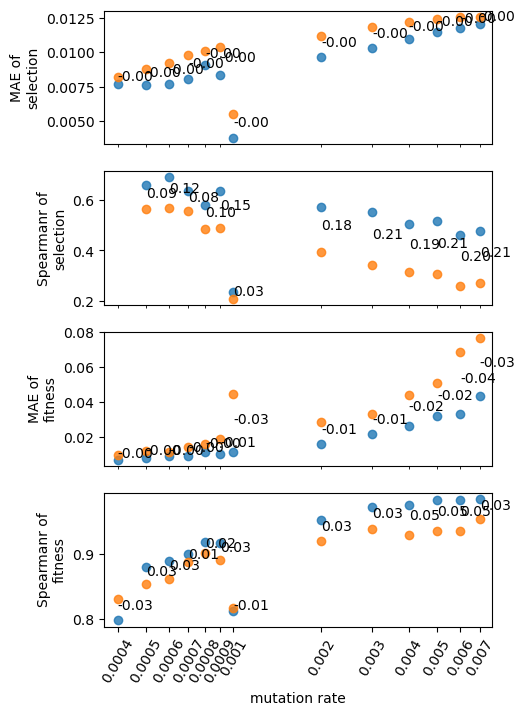

In [104]:
reload()
SH.plot_performance_for_ps(MAE_selection_dic_zero_mean_varying_mu, 
    Spearmanr_selection_dic_zero_mean_varying_mu, MAE_fitness_dic_zero_mean_varying_mu, 
    Spearmanr_fitness_dic_zero_mean_varying_mu, xs_zero_mean_varying_mu, 
    xlabel='mutation rate', 
    methods=['true_cov', 'SL'])

## meanS=0, stdS=0.015, varying max_num_cooccuring_muts

In [46]:
%%time
reload()
(MAE_selection_dic_zero_mean_varying_cooccurence, 
 Spearmanr_selection_dic_zero_mean_varying_cooccurence, 
 Pearsonr_selection_dic_zero_mean_varying_cooccurence, 
 MAE_fitness_dic_zero_mean_varying_cooccurence, 
 Spearmanr_fitness_dic_zero_mean_varying_cooccurence,
 Pearsonr_fitness_dic_zero_mean_varying_cooccurence) = SH.parse_performance_for_ps(ps_zero_mean_varying_cooccurence, 
    methods=['true_cov', 'SL'])

CPU times: user 6min 31s, sys: 3.75 s, total: 6min 35s
Wall time: 3min 27s


In [49]:
%%time
reload()
(MAE_selection_dic_zero_mean_varying_cooccurence_reg0, 
 Spearmanr_selection_dic_zero_mean_varying_cooccurence_reg0, 
 Pearsonr_selection_dic_zero_mean_varying_cooccurence_reg0, 
 MAE_fitness_dic_zero_mean_varying_cooccurence_reg0, 
 Spearmanr_fitness_dic_zero_mean_varying_cooccurence_reg0,
 Pearsonr_fitness_dic_zero_mean_varying_cooccurence_reg0) = SH.parse_performance_for_ps(ps_zero_mean_varying_cooccurence, 
    reg=1e-6, methods=['true_cov', 'SL'])


CPU times: user 6min 25s, sys: 2.13 s, total: 6min 27s
Wall time: 3min 16s


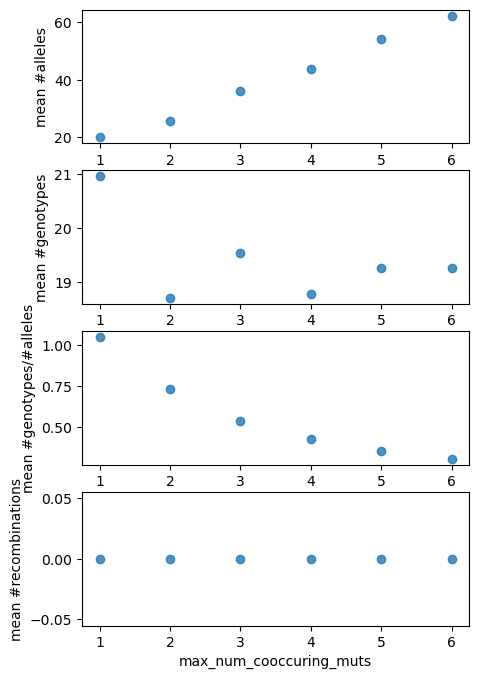

CPU times: user 2min 36s, sys: 850 ms, total: 2min 36s
Wall time: 2min 38s


In [44]:
%%time
reload()
SH.plot_num_genotypes_vs_num_alleles_for_ps(ps_zero_mean_varying_cooccurence, 
    xs_zero_mean_varying_cooccurence, xlabel='max_num_cooccuring_muts',
    log_scale_for_x=False)


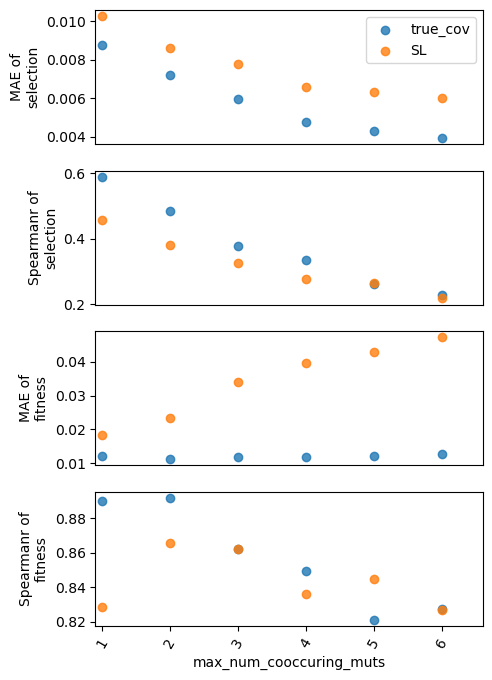

In [42]:
# Cooccuring selections are indistinguishable. 
# Behaviors in the 1st two panels are expected.
# SL would basically multiply fitness, which causes increasing MAE, 
# but not-changed Spearmanr

reload()
SH.plot_performance_for_ps(MAE_selection_dic_zero_mean_varying_cooccurence, 
    Spearmanr_selection_dic_zero_mean_varying_cooccurence, MAE_fitness_dic_zero_mean_varying_cooccurence, 
    Spearmanr_fitness_dic_zero_mean_varying_cooccurence, xs_zero_mean_varying_cooccurence, 
    xlabel='max_num_cooccuring_muts', log_scale_for_x=False,
    methods=['true_cov', 'SL'])

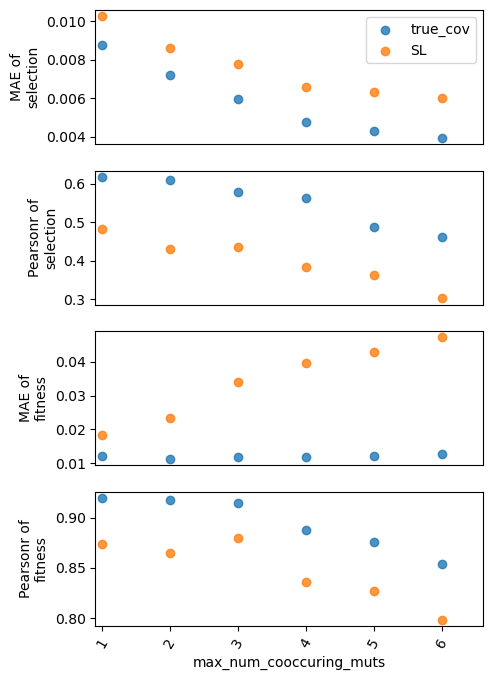

In [47]:
# What about Pearson's r?
reload()
SH.plot_performance_for_ps(MAE_selection_dic_zero_mean_varying_cooccurence, 
    Pearsonr_selection_dic_zero_mean_varying_cooccurence, MAE_fitness_dic_zero_mean_varying_cooccurence, 
    Pearsonr_fitness_dic_zero_mean_varying_cooccurence, xs_zero_mean_varying_cooccurence, 
    xlabel='max_num_cooccuring_muts', log_scale_for_x=False, Pearsonr_for_y=True,
    methods=['true_cov', 'SL'])

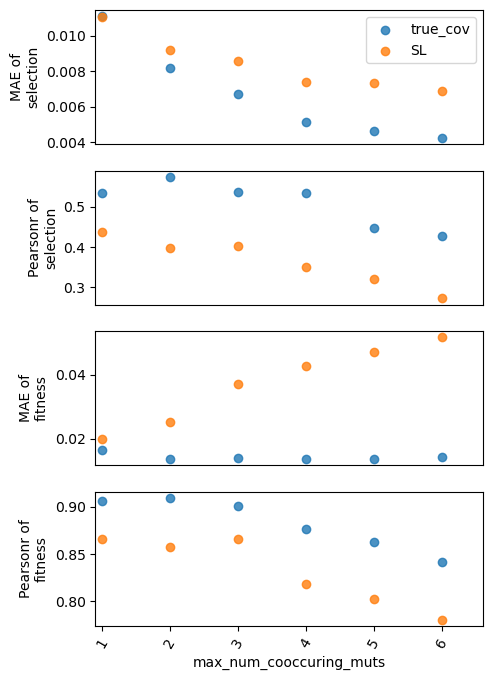

In [51]:
# Almost zero regularization
# Reg affects MAE, but not Pearsonr
reload()
SH.plot_performance_for_ps(MAE_selection_dic_zero_mean_varying_cooccurence_reg0, 
    Pearsonr_selection_dic_zero_mean_varying_cooccurence_reg0, MAE_fitness_dic_zero_mean_varying_cooccurence_reg0, 
    Pearsonr_fitness_dic_zero_mean_varying_cooccurence_reg0, xs_zero_mean_varying_cooccurence, 
    xlabel='max_num_cooccuring_muts', log_scale_for_x=False, Pearsonr_for_y=True,
    methods=['true_cov', 'SL'])

In [52]:
# Will too-strong linkage affect MPL's performance? 

## So far

We tried 
- increasing mutation rate, 
- introducing recombination,
- introducing cooccurence.

None of them significantly decreases Spearmanr of fitness inferred by SL.

We still don't know why SL is successful on inferring ranking of genotype fitness. 

For the paper, we can
- state that although Spearmanr is high for SL, MAE is worse than true_cov and recovered. 



### Controlled genotype fitness. Varying fitness magnitudes

In [70]:
%%time
reload()
(MAE_selection_dic_zero_mean_controlled_fitness, 
 Spearmanr_selection_dic_zero_mean_controlled_fitness, 
 Pearsonr_selection_dic_zero_mean_controlled_fitness, 
 MAE_fitness_dic_zero_mean_controlled_fitness, 
 Spearmanr_fitness_dic_zero_mean_controlled_fitness,
 Pearsonr_fitness_dic_zero_mean_controlled_fitness) = SH.parse_performance_for_ps(ps_zero_mean_controlled_fitness, 
    methods=['true_cov', 'SL'])

CPU times: user 23min 35s, sys: 13.3 s, total: 23min 48s
Wall time: 20min 57s


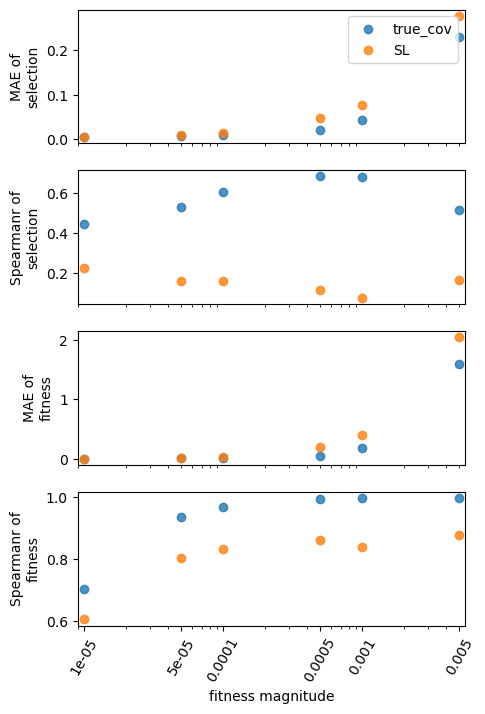

In [76]:
reload()
SH.plot_performance_for_ps(MAE_selection_dic_zero_mean_controlled_fitness, 
    Spearmanr_selection_dic_zero_mean_controlled_fitness, MAE_fitness_dic_zero_mean_controlled_fitness, 
    Spearmanr_fitness_dic_zero_mean_controlled_fitness, xs_zero_mean_controlled_fitness, 
    xlabel='fitness magnitude', log_scale_for_x=True, Pearsonr_for_y=False,
    methods=['true_cov', 'SL'])

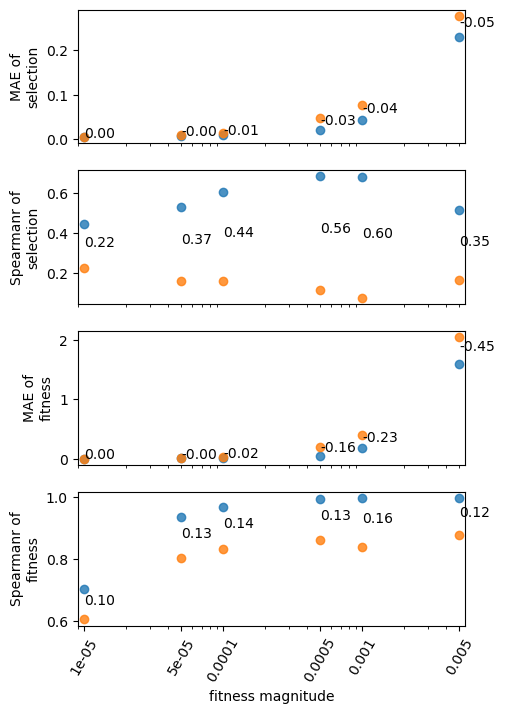

In [102]:
reload()
SH.plot_performance_for_ps(MAE_selection_dic_zero_mean_controlled_fitness, 
    Spearmanr_selection_dic_zero_mean_controlled_fitness, MAE_fitness_dic_zero_mean_controlled_fitness, 
    Spearmanr_fitness_dic_zero_mean_controlled_fitness, xs_zero_mean_controlled_fitness, 
    xlabel='fitness magnitude', log_scale_for_x=True, Pearsonr_for_y=False,
    methods=['true_cov', 'SL'])

### Normal WF simulation Varying sequence length

In [92]:
%%time
reload()
(MAE_selection_dic_WF_varying_L, 
 Spearmanr_selection_dic_WF_varying_L, 
 Pearsonr_selection_dic_WF_varying_L, 
 MAE_fitness_dic_WF_varying_L, 
 Spearmanr_fitness_dic_WF_varying_L,
 Pearsonr_fitness_dic_WF_varying_L) = SH.parse_performance_for_ps_for_WF_simulation(ps_WF_varying_L, 
    reg=1, muForInference=1e-3, methods=['true_cov', 'SL'])


n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
CPU times: user 1h 33min 23s, sys: 32.8 s, total: 1h 33min 56s
Wall time: 1h 35min 25s


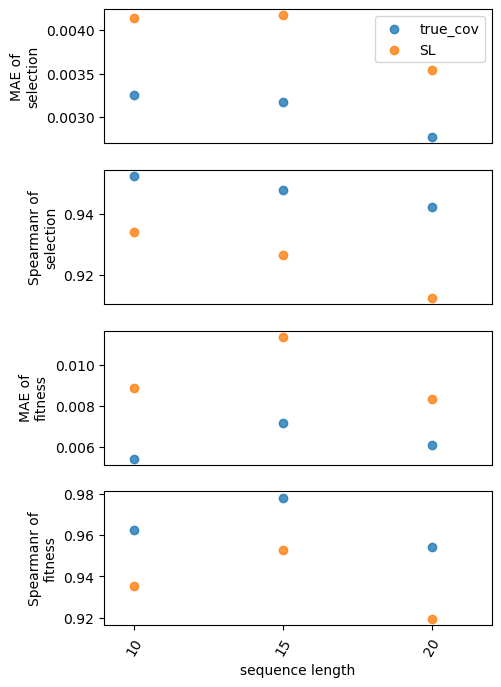

In [93]:
reload()
SH.plot_performance_for_ps(MAE_selection_dic_WF_varying_L, 
    Spearmanr_selection_dic_WF_varying_L, MAE_fitness_dic_WF_varying_L, 
    Spearmanr_fitness_dic_WF_varying_L, xs_WF_varying_L, 
    xlabel='sequence length', log_scale_for_x=False, Pearsonr_for_y=False,
    methods=['true_cov', 'SL'])

In [100]:
%%time
reload()
(MAE_selection_dic_WF_varying_L, 
 Spearmanr_selection_dic_WF_varying_L, 
 Pearsonr_selection_dic_WF_varying_L, 
 MAE_fitness_dic_WF_varying_L, 
 Spearmanr_fitness_dic_WF_varying_L,
 Pearsonr_fitness_dic_WF_varying_L) = SH.parse_performance_for_ps_for_WF_simulation(ps_WF_varying_L, 
    reg=1, muForInference=1e-3, methods=['true_cov', 'SL'])


n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	
n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	
CPU times: user 1h 52min 8s, sys: 39.4 s, total: 1h 52min 47s
Wall time: 1h 53min 5s


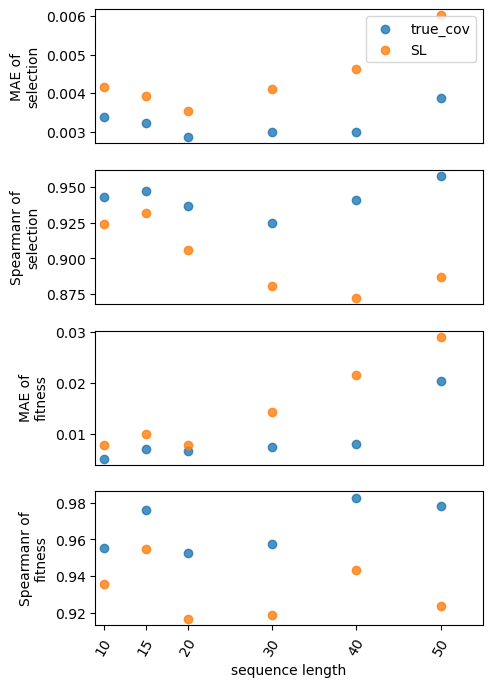

In [101]:
reload()
SH.plot_performance_for_ps(MAE_selection_dic_WF_varying_L, 
    Spearmanr_selection_dic_WF_varying_L, MAE_fitness_dic_WF_varying_L, 
    Spearmanr_fitness_dic_WF_varying_L, xs_WF_varying_L, 
    xlabel='sequence length', log_scale_for_x=False, Pearsonr_for_y=False,
    methods=['true_cov', 'SL'])

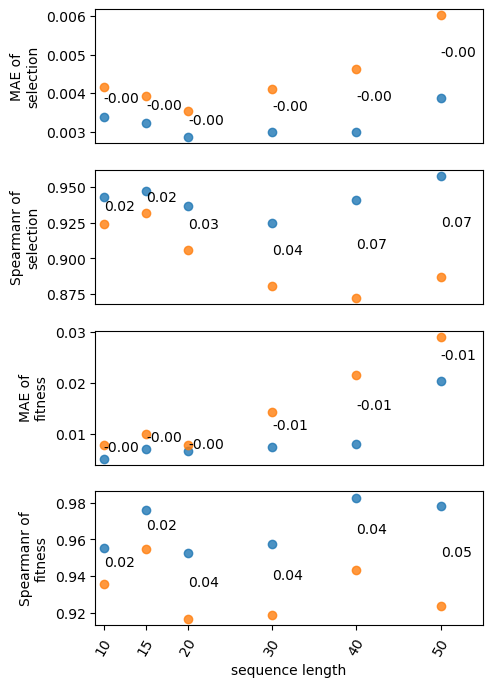

In [103]:
reload()
SH.plot_performance_for_ps(MAE_selection_dic_WF_varying_L, 
    Spearmanr_selection_dic_WF_varying_L, MAE_fitness_dic_WF_varying_L, 
    Spearmanr_fitness_dic_WF_varying_L, xs_WF_varying_L, 
    xlabel='sequence length', log_scale_for_x=False, Pearsonr_for_y=False,
    methods=['true_cov', 'SL'])

### Conclusion

- Is is generally easier to have high Spearmanr for fitness, than for selection. 
- The diff btwn true_cov & SL gets larger with
    - more alleles. (higher mutation rate)
    - fewer generations. (from cov-est paper's results)
    - fewer recombinations.
- The diff btwn true_cov & SL is not affected by
    - cooccurence of mutations. 
